In [144]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams.update({'font.size': 14})
matplotlib.rcParams['figure.figsize'] = [8,6]

### Van der Waals equation of state

$$ p = \frac{R T}{v-b} - \frac{a}{v^2}.$$

Compressibility factor at the critical point $c$ is
$$ Z_{c} = \frac{p_c v_c}{R T_c} = \frac{3}{8}.$$

Using reduced variables 
$$\bar T = T/T_c$$
$$\bar p = p/p_c$$
$$\bar v = v/v_c$$
and the conditions at the critical point,
$$ \left.\frac{\partial p}{\partial v}\right|_T = 0, $$

$$ \left.\frac{\partial^2 p}{\partial v^2}\right|_T = 0, $$
it can be shown that the VdW parameters for the reduced form are
$$ a = 3 $$
$$ b = 1/3 $$
$$ \bar R = 1/Z_c $$

As such the VdW eos can be writen as, 
$$ \bar p = \frac{8\bar T}{3\bar v-1} - \frac{3}{\bar v^2}.$$

In [145]:
class VdW_RF:
    
#     no constructor needed.

    def pressure_tv(self,t,v):
        return 8*t/(3*v-1) - 3/v**2
    
    def specvolume_pt(self,p,t):
        coeff = [p, -1.0/3.0*p - 8.0/3.0*t, 3.0, -1.0]
        v = np.roots(coeff)
        return v

### Peng Robinson equation of state. 
Can be used as a starting point for the homework assignment. 

In [143]:
class PengRobinson:
    
    # constructor needed in case class also stores variables
    # for example: parameters of the Peng Robinson equation of state - also critical conditions. 
    
    def __init__(self,a,b,c,d,R): 
        self.a = a
    
    def pressure_tv(self,t,v):
        return # your own function

### Instantiate the EOS

In [135]:
myeos = VdW_RF()

### Test it

In [147]:
p = myeos.pressure_tv(1.0, 1.0)
print(p)

1.0


### Plot the p-v diagram

Text(0, 0.5, 'reduced pressure $p_r$')

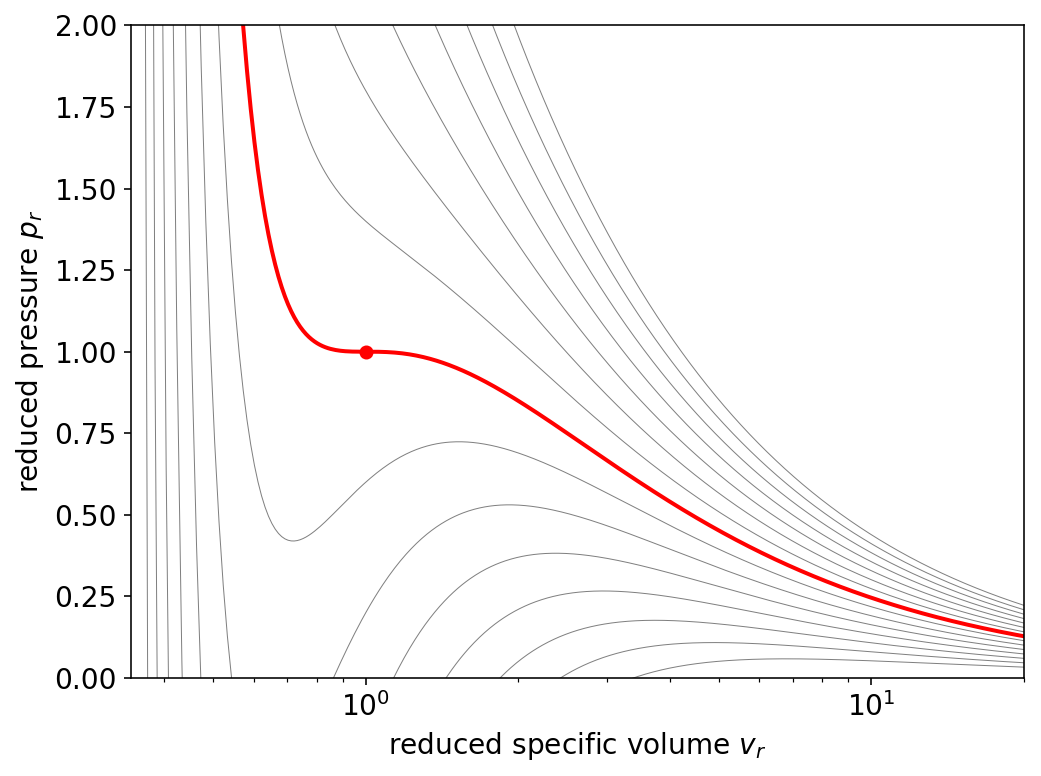

In [152]:
svol = np.linspace(1.0/3.0+1e-2, 100, 10000)
temp = np.linspace(0.3, 1.7, 15)

fig, ax = plt.subplots()

for t in temp: 
    lcolor = [0.5,0.5,0.5]
    lwidth = 0.5
    if t == 1: # plot the critical isotherm in red
        lcolor = 'r'
        lwidth = 2.0
    pres = eos.pressure_tv(t,svol)
    ax.semilogx(svol,pres,linewidth = lwidth,color=lcolor)
    
ax.semilogx(1,1,'ro') # plot the critical point

ax.set_xlim(1./3+1e-2,20)
ax.set_ylim(1e-3,2)
ax.set_xlabel("reduced specific volume $v_r$")
ax.set_ylabel("reduced pressure $p_r$")

### Check the roots and prepare for Maxwell's equal are construction of the VLE region

The roots are:  [1.90858876 1.25862012 0.59469587]


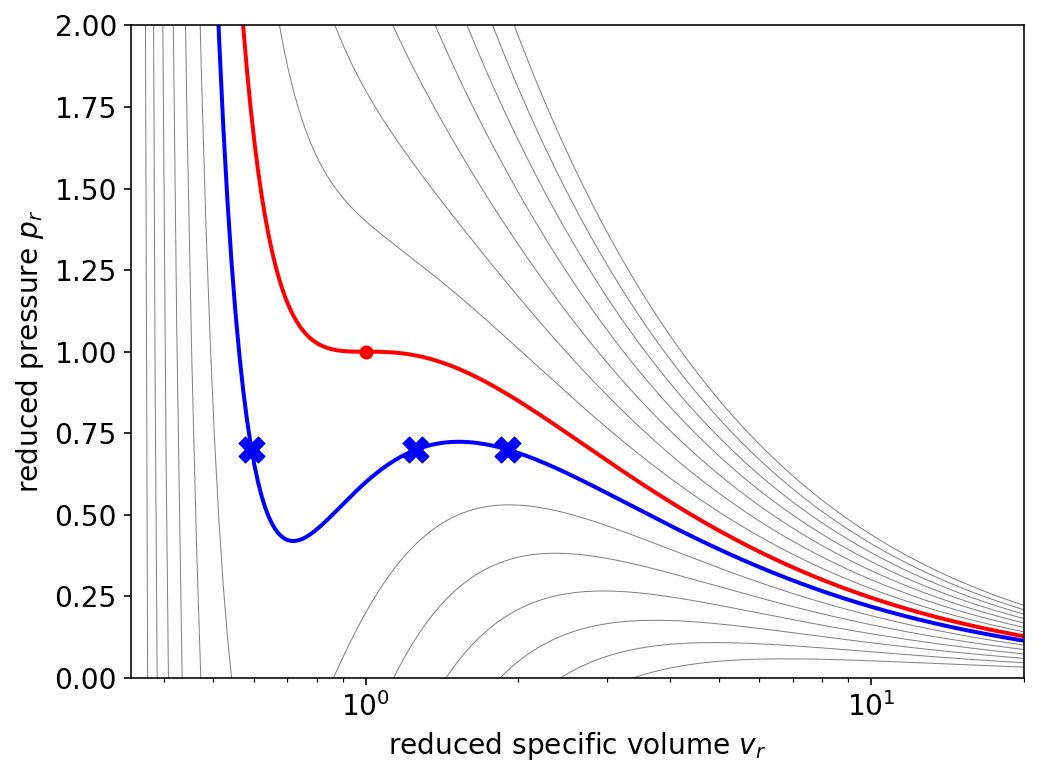

In [154]:
pres = 0.7
temp = 0.9

# plot the isotherm at t = temp
ax.semilogx(svol, eos.pressure_tv(temp,svol), 'b',linewidth = 2)

# calculate the specific volume for t=temp and p=pres
v = myeos.specvolume(pres, temp)
print("The roots are: ", v)

# plot the roots 
ax.semilogx(np.real(v), [pres,pres,pres], 'xb', markersize = 10, markeredgewidth = 5)

# show figure
fig

### import CoolProp

In [142]:
from CoolProp.CoolProp import PropsSI